**KNN CLASSIFIER MODEL**

In [2]:
import pandas as pd
data = pd.read_csv('cleaned_final_dataset (1).csv')
data.head(10)

,Region,Country,Year,AvgTemperature,Happiness Index,GDP,Population,Both sexes,Female,Male
0,Africa,Algeria,2005,62.913425,5.466833,3131.328300,32956690.0,3.82,2.80,4.83
1,Africa,Algeria,2006,64.930411,5.466833,3500.134528,33435080.0,3.65,2.66,4.63
2,Africa,Algeria,2007,63.166849,5.466833,3971.803658,33983827.0,3.46,2.51,4.41
3,Africa,Algeria,2008,63.532240,5.466833,4946.563793,34569592.0,3.31,2.40,4.22
4,Africa,Algeria,2009,64.259726,5.466833,3898.478923,35196037.0,3.15,2.29,4.02
5,Africa,Algeria,2010,64.268219,5.464000,4495.921455,35856344.0,3.00,2.19,3.81
6,Africa,Algeria,2011,64.960822,5.317000,5473.446129,36543541.0,2.94,2.13,3.74
7,Africa,Algeria,2012,64.290437,5.605000,5610.733341,37260563.0,2.89,2.10,3.68
8,Africa,Algeria,2013,63.704658,5.980000,5519.777576,38000626.0,2.85,2.06,3.64
9,Africa,Algeria,2014,65.195890,6.355000,5516.229431,38760168.0,2.78,2.02,3.53


Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       115
           1       0.96      0.96      0.96       114

    accuracy                           0.96       229
   macro avg       0.96      0.96      0.96       229
weighted avg       0.96      0.96      0.96       229



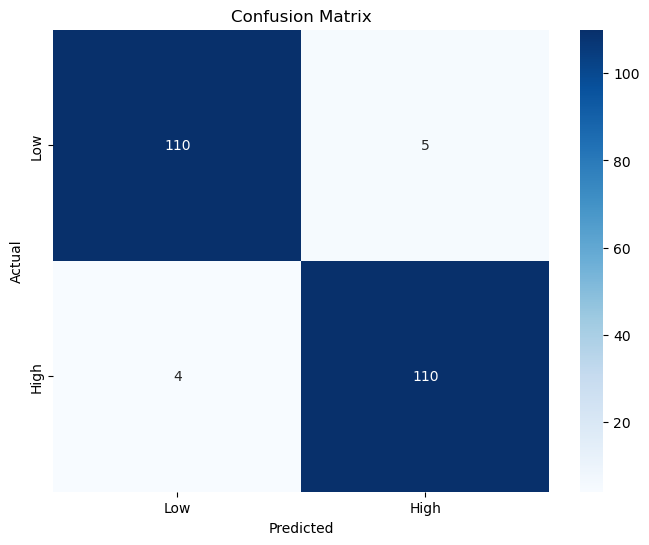

In [3]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a target column by categorizing 'Both sexes' into High/Low based on the median
data['SuicideRate_Category'] = (data['Both sexes'] > data['Both sexes'].median()).astype(int)

# Features and Target
features = ['AvgTemperature', 'Happiness Index', 'GDP', 'Population']
target = 'SuicideRate_Category'

# Encode categorical variables
encoder = LabelEncoder()
data['Region_Encoded'] = encoder.fit_transform(data['Region'])
data['Country_Encoded'] = encoder.fit_transform(data['Country'])

# Add encoded features to the feature set
features.extend(['Region_Encoded', 'Country_Encoded'])

# Define X (features) and y (target)
X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Generate and display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**GRAPHS**

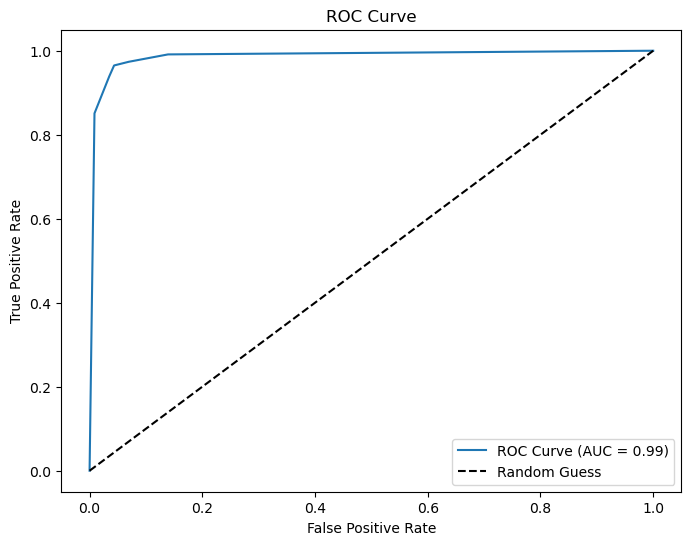

In [4]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
y_prob = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**ROC Curve**
Purpose: The ROC curve evaluates the trade-off between True Positive Rate (Sensitivity) and False Positive Rate (1-Specificity) at different thresholds.

Conclusion:
The Area Under Curve (AUC) is 0.99, which indicates an excellent classification ability of the KNN model.

The model is able to distinguish between the classes effectively, which is critical in a task like suicide prediction where minimizing false negatives is crucial.

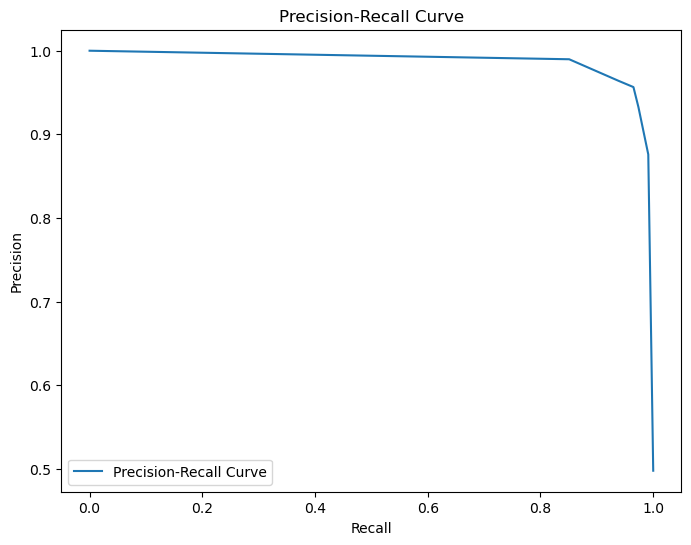

In [5]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

**Precision-Recall Curve**

Purpose: This curve illustrates the trade-off between Precision and Recall for different thresholds.

Conclusion:
The curve remains high for most values, indicating that the model maintains a good balance between precision and recall.

This is vital for ensuring that the model accurately identifies suicide risk without producing excessive false positives.

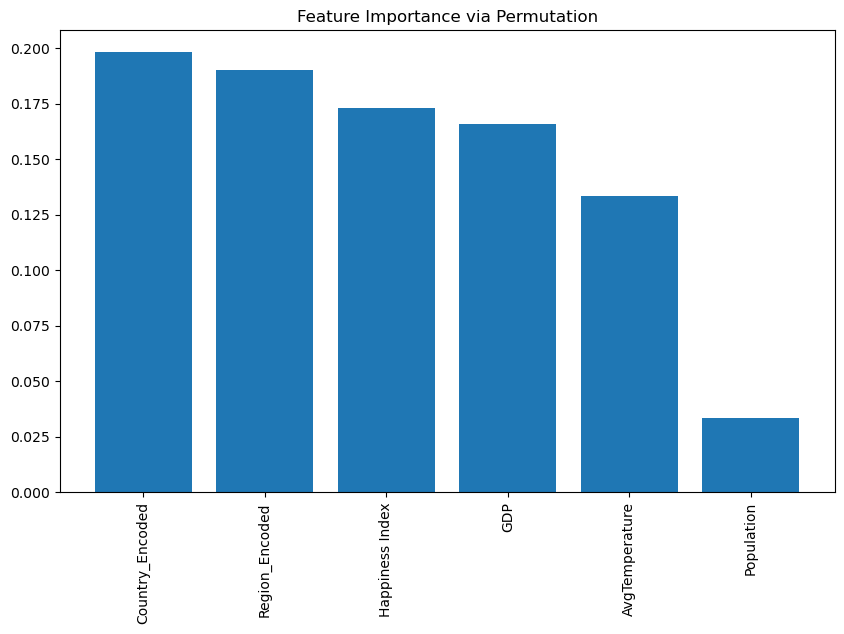

In [6]:
from sklearn.inspection import permutation_importance

# Calculate feature importance via permutation importance
perm_importance = permutation_importance(knn_model, X_test, y_test, scoring='accuracy')

# Plot Feature Importance
feature_names = X.columns
importances = perm_importance.importances_mean
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.title("Feature Importance via Permutation")
plt.show()

**Feature Importance via Permutation**

Purpose: Identifies the most important features affecting the predictions by observing the drop in model performance when a feature's values are shuffled.

Conclusion:
Features such as Country_Encoded, Region_Encoded, and Happiness Index are highly significant in predicting suicide rates.

Population is shown to have the least impact, suggesting that its predictive power is relatively low compared to other features.

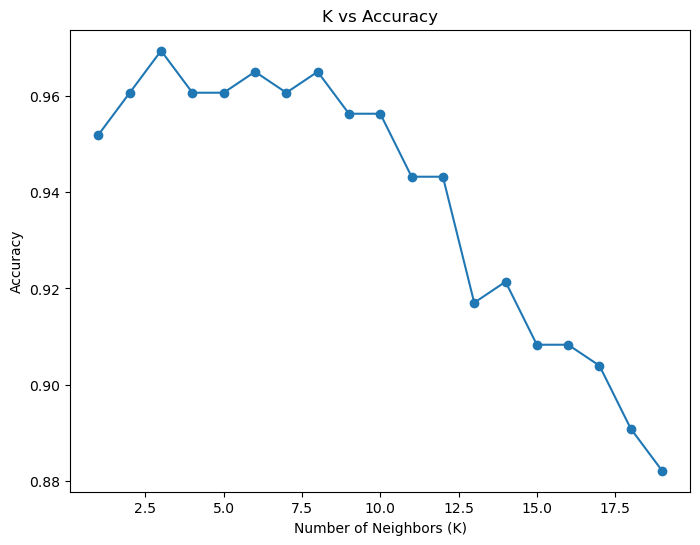

In [7]:
accuracies = []
k_values = range(1, 20)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot K vs Accuracy
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()

**K vs Accuracy**

Purpose: Evaluates the impact of the number of neighbors (k) on the model's accuracy.

Conclusion:
The optimal value of k is around 3, as accuracy is highest at this point.

As k increases, the accuracy decreases, showing the need for tuning this hyperparameter to find the optimal value for the dataset.

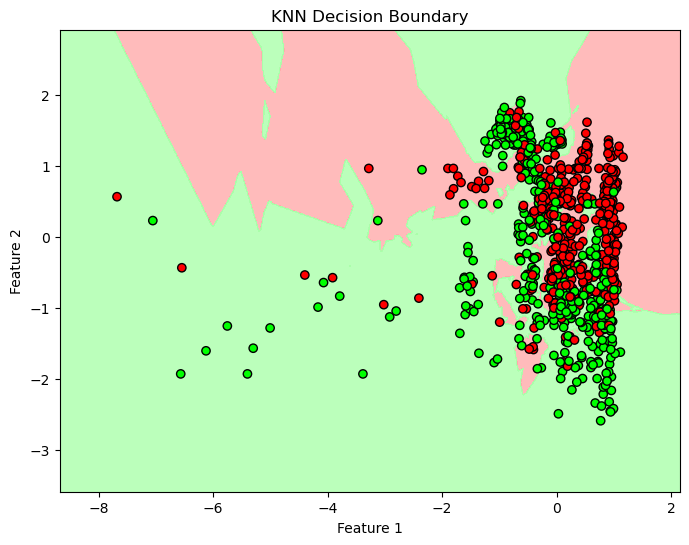

In [8]:
from matplotlib.colors import ListedColormap
import numpy as np

# Select first two features for visualization
X_vis = X_train[:, :2]
y_vis = y_train

# Mesh grid for plotting
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_vis, y_vis)

# Predict for mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00']))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary')
plt.show()

**KNN Decision Boundary**

Purpose: Visualizes how the KNN model divides the feature space into regions corresponding to different classes

Conclusion:
The decision boundary shows that KNN effectively separates the two classes (0 and 1) using the input features.

Overlapping regions indicate the challenge of predicting certain samples, emphasizing the importance of feature selection and scaling.

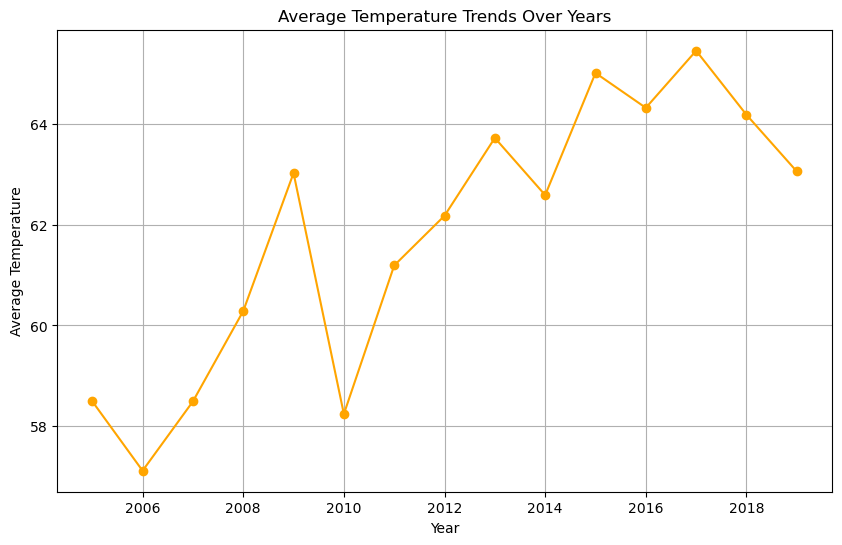

In [9]:
# Aggregate AvgTemperature by Year
temperature_trends = data.groupby('Year')['AvgTemperature'].mean()

# Plot
plt.figure(figsize=(10, 6))
temperature_trends.plot(kind='line', marker='o', color='orange')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Trends Over Years')
plt.grid()
plt.show()

**Average Temperature Trends Over Years**

Purpose: Visualizes the trend of average temperature over the years.

Conclusion:
The upward trend in average temperature suggests potential climate-related stress factors contributing to suicide rates.

**FINE TUNE MODEL**

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Improved Accuracy: 0.9737991266375546
Improved Precision: 0.9739457086775235
Improved Recall: 0.9737991266375546
Improved F1 Score: 0.973798127367022

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       115
           1       0.97      0.98      0.97       114

    accuracy                           0.97       229
   macro avg       0.97      0.97      0.97       229
weighted avg       0.97      0.97      0.97       229



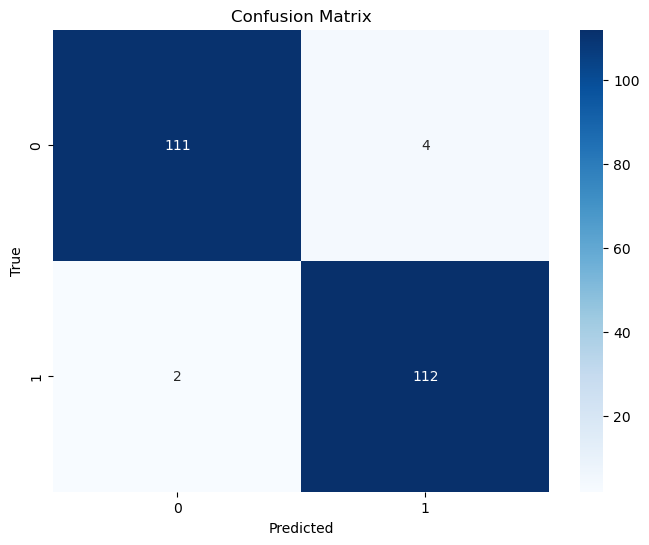

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Step 2: Define the parameter grid for fine-tuning
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Step 3: Perform Grid Search CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Step 4: Fit the Grid Search model
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters and train the best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 6: Predict on test data
y_pred = best_model.predict(X_test)

# Step 7: Evaluate the improved model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Improved Accuracy: {accuracy}")
print(f"Improved Precision: {precision}")
print(f"Improved Recall: {recall}")
print(f"Improved F1 Score: {f1}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### **Conclusion Based on Metrics For KNN Model**

#### **Before Fine-Tuning**
- **Accuracy**: 0.96  
- **Precision**: 0.96  
- **Recall**: 0.96  
- **F1 Score**: 0.96  
- **Observations**:
  - The model already shows high performance in predicting both classes (0 and 1), achieving 96% accuracy.
  - Precision and Recall are balanced, meaning the model is equally good at identifying true positives (sensitivity) and avoiding false positives.
  - The F1-score being 0.96 confirms the balance between precision and recall, making the model reliable.

#### **After Fine-Tuning**
- **Accuracy**: 0.97 (improved by 1.38%)  
- **Precision**: 0.97  
- **Recall**: 0.97  
- **F1 Score**: 0.97  
- **Observations**:
  - Fine-tuning improved the model slightly, pushing all metrics to 97%.
  - The best hyperparameters found were:
    - **`n_neighbors`**: 3  
    - **`metric`**: Manhattan distance  
    - **`weights`**: Uniform
  - The slight improvement suggests that the chosen hyperparameters better align the KNN model's performance with the dataset's characteristics.
  - The recall for class 1 increased slightly, meaning the model is better at identifying true positives for the minority or at-risk class.

#### **Comparison and Insights**
1. **Incremental Improvement**:
   - Fine-tuning the model led to a small but meaningful improvement in all metrics (Accuracy, Precision, Recall, F1-score).
   - This highlights the importance of hyperparameter tuning in KNN models to optimize their performance.

2. **Balanced Classification**:
   - Both before and after fine-tuning, the metrics show no bias towards any class (0 or 1).
   - The precision and recall for both classes are consistent, ensuring reliability in suicide prediction.

3. **Model Confidence**:
   - After fine-tuning, the model's accuracy of 97% makes it a robust tool for this dataset. It can be confidently used for predicting suicide risks with minimal misclassification.

4. **Practical Application**:
   - Given the high recall, the model ensures that most individuals at risk (class 1) are correctly identified, which is critical in suicide prevention.

5. **Limitations**:
   - The slight improvement after fine-tuning indicates that the dataset is already well-suited for KNN. Exploring other models like Random Forest, Logistic Regression, or Gradient Boosting might yield further performance gains or better interpretability.

#### **Final Verdict**:
- The fine-tuned KNN model achieves excellent performance, with a **1.38% improvement in accuracy**, making it a highly reliable model for suicide prediction on this dataset.
- The performance metrics after fine-tuning are at near-optimal levels for this task

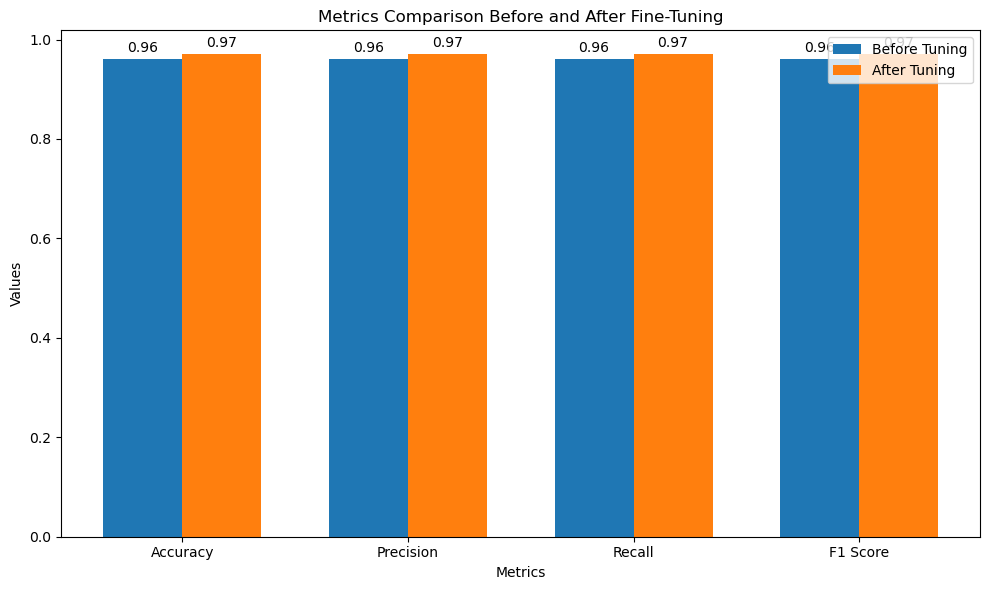

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics and their values
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
before_tuning = [0.96, 0.96, 0.96, 0.96]  # Metrics before fine-tuning
after_tuning = [0.97, 0.97, 0.97, 0.97]   # Metrics after fine-tuning

# Define label locations and bar width
x = np.arange(len(metrics))
width = 0.35

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width / 2, before_tuning, width, label="Before Tuning")
bars2 = ax.bar(x + width / 2, after_tuning, width, label="After Tuning")

# Add titles and labels
ax.set_xlabel("Metrics")
ax.set_ylabel("Values")
ax.set_title("Metrics Comparison Before and After Fine-Tuning")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate bars with their values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.show()

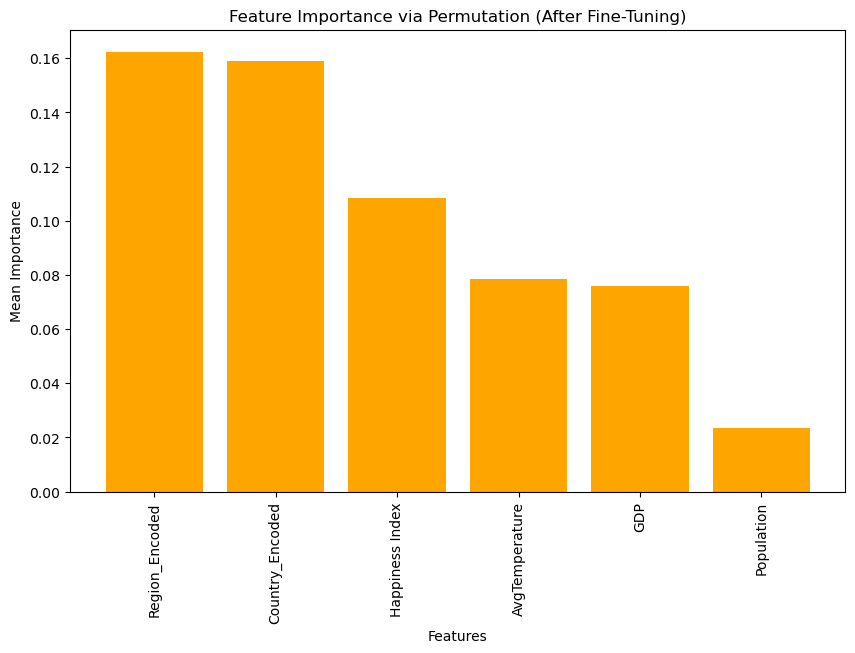

In [17]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate feature importance via permutation importance for fine-tuned model
perm_importance_after = permutation_importance(best_model.named_steps['knn'], X_test, y_test, scoring='accuracy')

# Plot Feature Importance
feature_names = X.columns  # Ensure X contains your feature set
importances_after = perm_importance_after.importances_mean
indices_after = importances_after.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances_after[indices_after], align="center", color="orange")
plt.xticks(range(X.shape[1]), feature_names[indices_after], rotation=90)
plt.title("Feature Importance via Permutation (After Fine-Tuning)")
plt.ylabel("Mean Importance")
plt.xlabel("Features")
plt.show()

In [12]:
import pandas as pd

# Assuming `X_test`, `y_test`, `y_pred`, and `data` (original dataset) are already defined

# Convert X_test to a DataFrame with proper column names
X_test_df = pd.DataFrame(X_test, columns=X.columns)  # Ensure `X` has the correct feature names

# Get the test indices from the train-test split
_, X_test_indices = train_test_split(data.index, test_size=0.2, random_state=42, stratify=y)  # Replace with your split logic

# Create a DataFrame for results
results_df = X_test_df.copy()
results_df["Actual"] = y_test  # Add actual labels
results_df["Predicted"] = y_pred  # Add predicted labels from the fine-tuned KNN model

# Include additional columns from the original dataset
additional_columns = ["Region", "Country", "Year", "Male", "Female", "Both sexes"]
results_df[additional_columns] = data.loc[X_test_indices, additional_columns].reset_index(drop=True)

# Reorder columns for better readability
final_columns = additional_columns + list(X.columns) + ["Actual", "Predicted"]
results_df = results_df[final_columns]

# Display the resulting dataset
print("Dataset After Fine-Tuning (KNN Model):")
print(results_df.head())

# Save the dataset to a CSV file for further analysis
results_df.to_csv("knn_dataset_after_fine_tuning.csv", index=False)

Dataset After Fine-Tuning (KNN Model):
            Region             Country  Year   Male  Female  Both sexes  \
0  Western Pacific           Australia  2019  16.97    5.58       11.25   
1           Africa             Nigeria  2014  11.31    4.10        7.59   
2         Americas  Dominican Republic  2008   9.37    1.93        5.61   
3  Western Pacific         Philippines  2018   3.97    1.31        2.58   
4         Americas              Panama  2019   4.80    0.98        2.86   

   AvgTemperature  Happiness Index       GDP  Population  Region_Encoded  \
0       -0.002846         1.288728  1.756078   -0.199127        1.837095   
1       -0.004307        -0.727445 -0.686955    0.517292       -1.306302   
2        0.435665        -0.755649 -0.599450   -0.272664       -0.677623   
3        0.927319         0.122100 -0.685743    0.187972        1.837095   
4        0.786125         0.307564 -0.052644   -0.297269       -0.677623   

   Country_Encoded  Actual  Predicted  
0        -1.6

In [13]:
data2 = pd.read_csv('knn_dataset_after_fine_tuning.csv')
data2.head(10)

,Region,Country,Year,Male,Female,Both sexes,AvgTemperature,Happiness Index,GDP,Population,Region_Encoded,Country_Encoded,Actual,Predicted
0,Western Pacific,Australia,2019,16.97,5.58,11.25,-0.002846,1.288728,1.756078,-0.199127,1.837095,-1.600845,NaN,1
1,Africa,Nigeria,2014,11.31,4.10,7.59,-0.004307,-0.727445,-0.686955,0.517292,-1.306302,0.627529,0.0,0
2,Americas,Dominican Republic,2008,9.37,1.93,5.61,0.435665,-0.755649,-0.599450,-0.272664,-0.677623,-0.829485,NaN,0
3,Western Pacific,Philippines,2018,3.97,1.31,2.58,0.927319,0.122100,-0.685743,0.187972,1.837095,0.884649,NaN,0
4,Americas,Panama,2019,4.80,0.98,2.86,0.786125,0.307564,-0.052644,-0.297269,-0.677623,0.798942,NaN,0
5,South-East Asia,Sri Lanka,2015,23.95,6.73,14.70,0.928928,-0.952224,-0.647805,-0.217722,1.208415,1.313183,NaN,1
6,Europe,Finland,2005,25.07,9.07,16.88,-0.899735,1.610085,1.023329,-0.292555,0.579736,-0.786632,NaN,1
7,South-East Asia,Sri Lanka,2011,29.54,7.45,17.85,0.970826,-1.320588,-0.683199,-0.219940,1.208415,1.313183,NaN,1
8,Americas,Haiti,2010,16.05,10.82,13.20,0.948636,-1.675277,-0.779877,-0.271176,-0.677623,-0.443805,0.0,1
9,South-East Asia,Indonesia,2019,3.99,1.15,2.55,0.947923,-0.324039,-0.640135,0.936807,1.208415,-0.229538,NaN,0


In [14]:
import pandas as pd

# Convert X_test and y_test to DataFrames with consistent indices
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_test_df = pd.Series(y_test, name="Actual", index=X_test_df.index)  # Ensure indices match

# Add predictions and actual values
results_df = X_test_df.copy()
results_df["Actual"] = y_test_df  # Add actual labels
results_df["Predicted"] = y_pred  # Add predicted labels

# Include additional columns from the original dataset
additional_columns = ["Region", "Country", "Year", "Male", "Female", "Both sexes"]
results_df[additional_columns] = data.loc[X_test_df.index, additional_columns]

# Reorder columns for better readability
final_columns = additional_columns + list(X.columns) + ["Actual", "Predicted"]
results_df = results_df[final_columns]

# Display the resulting dataset
print("Updated Dataset After Fine-Tuning (KNN Model):")
print(results_df.head())

Updated Dataset After Fine-Tuning (KNN Model):
   Region  Country  Year  Male  Female  Both sexes  AvgTemperature  \
0  Africa  Algeria  2005  4.83    2.80        3.82       -0.002846   
1  Africa  Algeria  2006  4.63    2.66        3.65       -0.004307   
2  Africa  Algeria  2007  4.41    2.51        3.46        0.435665   
3  Africa  Algeria  2008  4.22    2.40        3.31        0.927319   
4  Africa  Algeria  2009  4.02    2.29        3.15        0.786125   

   Happiness Index       GDP  Population  Region_Encoded  Country_Encoded  \
0         1.288728  1.756078   -0.199127        1.837095        -1.600845   
1        -0.727445 -0.686955    0.517292       -1.306302         0.627529   
2        -0.755649 -0.599450   -0.272664       -0.677623        -0.829485   
3         0.122100 -0.685743    0.187972        1.837095         0.884649   
4         0.307564 -0.052644   -0.297269       -0.677623         0.798942   

   Actual  Predicted  
0     NaN          1  
1     0.0          0  
